In [1]:
import pandas as pd
import os
import sys
import warnings
warnings.filterwarnings("ignore")
# Append the parent directory to the system path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../')))

In [2]:
import wbdata
import pandas as pd
import datetime

# Define the indicator for GDP growth (annual %)
indicators = {'NY.GDP.MKTP.KD.ZG': 'GDP growth (annual %)'}

# Set the date range
start_date = datetime.datetime(1987, 1, 1)
end_date = datetime.datetime(2022, 12, 31)

# Retrieve GDP growth data for the world
gdp_growth_data = wbdata.get_dataframe(indicators, country='WLD', date=(start_date, end_date), freq='Y')

# Display the GDP growth data
print(gdp_growth_data)

# Save to CSV
gdp_growth_data.to_csv('../data/world_gdp_growth_data.csv')

      GDP growth (annual %)
date                       
2022               3.089607
2021               6.259851
2020              -2.932043
2019               2.642216
2018               3.286613
2017               3.460239
2016               2.820557
2015               3.126136
2014               3.123870
2013               2.868222
2012               2.709115
2011               3.327133
2010               4.529546
2009              -1.355782
2008               2.062496
2007               4.373277
2006               4.442793
2005               4.005866
2004               4.469259
2003               3.104276
2002               2.302837
2001               2.025403
2000               4.531095
1999               3.549717
1998               2.853925
1997               3.929714
1996               3.574686
1995               3.084615
1994               3.323942
1993               1.812976
1992               2.019257
1991               1.255826
1990               2.764541
1989               3

In [3]:
import wbdata
import pandas as pd
import datetime

# Define the indicator for unemployment rate
# indicators = {'SL.UEM.TOTL.ZS': 'Unemployment Rate (%)'}  # You can replace this with the desired unemployment indicator code
indicators = {'SL.UEM.TOTL.ZS': 'Unemployment Rate (%)'}  # You can replace this with the desired unemployment indicator code

# Set the date range
start_date = datetime.datetime(1987, 1, 1)
end_date = datetime.datetime(2022, 12, 31)

# Retrieve unemployment data for the world
unemployment_data = wbdata.get_dataframe(indicators, country='WLD', date=(start_date, end_date), freq='Y')

# Display the unemployment data
print(unemployment_data)

unemployment_data.to_csv('../data/world_unemployment_data.csv')

      Unemployment Rate (%)
date                       
2022               5.264616
2021               6.033761
2020               6.585288
2019               5.582980
2018               5.756398
2017               5.916141
2016               6.010331
2015               6.048849
2014               6.016229
2013               6.167134
2012               6.228273
2011               6.240482
2010               6.389465
2009               6.514687
2008               5.936694
2007               5.899677
2006               6.106586
2005               6.366465
2004               6.449677
2003               6.571283
2002               6.468308
2001               6.223468
2000               6.131118
1999               6.265528
1998               6.125231
1997               5.954036
1996               5.908678
1995               5.820786
1994               5.667754
1993               5.417837
1992               5.149939
1991               4.996340
1990                    NaN
1989                

In [4]:
import wbdata
# wbdata.get_sources()
indicators={'FP.CPI.TOTL.ZG': 'Inflation'}

inflation_data=wbdata.get_dataframe(indicators, country='WLD', date = ("1987-05-20", "2022-11-14"), freq='Y', source=None, parse_dates=False, keep_levels=False, skip_cache=False)
inflation_data
inflation_data.to_csv('../data/world_inflation_data.csv')

In [10]:
import pandas as pd
import numpy as np

def generate_daily_inflation(start_date='1987-05-20', end_date='2022-11-14', annual_inflation_rates=None):
    # Generate daily date range
    dates = pd.date_range(start=start_date, end=end_date)
    daily_df = pd.DataFrame({'Date': dates})
    
    # Ensure the 'Year' column is an integer
    annual_inflation_rates['Year'] = annual_inflation_rates['date'].astype(int)
    annual_inflation_rates = annual_inflation_rates.rename(columns={'Inflation': 'Annual_Inflation_Rate'})

    # Calculate daily inflation rate
    inflation_data = []
    for _, row in annual_inflation_rates.iterrows():
        daily_rate = (1 + row['Annual_Inflation_Rate']) ** (1 / 365) - 1
        inflation_data.append({'Year': row['Year'], 'Daily_Inflation_Rate': daily_rate})
    
    inflation_df = pd.DataFrame(inflation_data)
    
    # Map each date to its corresponding annual daily inflation rate
    daily_df['Year'] = daily_df['Date'].dt.year
    daily_df = daily_df.merge(inflation_df, on='Year', how='left')
    
    # Calculate the cumulative inflation factor
    daily_df['Cumulative_Inflation_Factor'] = (1 + daily_df['Daily_Inflation_Rate']).cumprod()

    # Select relevant columns
    daily_df = daily_df[['Date', 'Cumulative_Inflation_Factor','Daily_Inflation_Rate']]
    return daily_df

# Load annual inflation rates data from CSV
annual_inflation_rates = pd.read_csv("../data/world_inflation_data.csv")

# Generate daily inflation factors
daily_inflation_df = generate_daily_inflation(annual_inflation_rates=annual_inflation_rates)
daily_inflation_df.to_csv("../data/world_daily_inflation_data.csv")
print(daily_inflation_df)

            Date  Cumulative_Inflation_Factor  Daily_Inflation_Rate
0     1987-05-20                 1.005229e+00              0.005229
1     1987-05-21                 1.010485e+00              0.005229
2     1987-05-22                 1.015769e+00              0.005229
3     1987-05-23                 1.021081e+00              0.005229
4     1987-05-24                 1.026420e+00              0.005229
...          ...                          ...                   ...
12958 2022-11-10                 5.036726e+25              0.006028
12959 2022-11-11                 5.067087e+25              0.006028
12960 2022-11-12                 5.097632e+25              0.006028
12961 2022-11-13                 5.128360e+25              0.006028
12962 2022-11-14                 5.159274e+25              0.006028

[12963 rows x 3 columns]


In [11]:
import pandas as pd
import numpy as np

def generate_daily_inflation(start_date='1987-05-20', end_date='2022-11-14', annual_gdp_growth_rate=None):
    # Generate daily date range
    dates = pd.date_range(start=start_date, end=end_date)
    daily_df = pd.DataFrame({'Date': dates})
    
    # Ensure the 'Year' column is an integer
    annual_gdp_growth_rate['Year'] = annual_gdp_growth_rate['date'].astype(int)
    annual_gdp_growth_rate = annual_gdp_growth_rate.rename(columns={'GDP growth (annual %)': 'Annual_GDP_Growth_Rate'})

    # Calculate daily inflation rate
    gdp_growth_data = []
    for _, row in annual_gdp_growth_rate.iterrows():
        daily_rate = (1 + row['Annual_GDP_Growth_Rate']) ** (1 / 365) - 1
        gdp_growth_data.append({'Year': row['Year'], 'Daily_GDP_Growth_Rate': daily_rate})
    
    inflation_df = pd.DataFrame(gdp_growth_data)
    
    # Map each date to its corresponding annual daily inflation rate
    daily_df['Year'] = daily_df['Date'].dt.year
    daily_df = daily_df.merge(inflation_df, on='Year', how='left')
    
    # Calculate the cumulative inflation factor
    daily_df['Cumulative_GDP_Growth_Factor'] = (1 + daily_df['Daily_GDP_Growth_Rate']).cumprod()

    # Select relevant columns
    daily_df = daily_df[['Date', 'Cumulative_GDP_Growth_Factor','Daily_GDP_Growth_Rate']]
    return daily_df

# Load annual inflation rates data from CSV
annual_gdp_growth_rate = pd.read_csv("../data/world_gdp_growth_data.csv")

# Generate daily inflation factors
daily_gdp_df = generate_daily_inflation(annual_gdp_growth_rate=annual_gdp_growth_rate)
daily_gdp_df.to_csv("../data/world_daily_gdp_growth_data.csv")
print(daily_inflation_df)

            Date  Cumulative_Inflation_Factor  Daily_Inflation_Rate
0     1987-05-20                 1.005229e+00              0.005229
1     1987-05-21                 1.010485e+00              0.005229
2     1987-05-22                 1.015769e+00              0.005229
3     1987-05-23                 1.021081e+00              0.005229
4     1987-05-24                 1.026420e+00              0.005229
...          ...                          ...                   ...
12958 2022-11-10                 5.036726e+25              0.006028
12959 2022-11-11                 5.067087e+25              0.006028
12960 2022-11-12                 5.097632e+25              0.006028
12961 2022-11-13                 5.128360e+25              0.006028
12962 2022-11-14                 5.159274e+25              0.006028

[12963 rows x 3 columns]


In [12]:
import pandas as pd
import numpy as np

def generate_daily_unemployment_interpolated(start_date='1987-05-20', end_date='2022-11-14', annual_unemployment_rate=None, lag_days=30, rolling_window=90):

    # Generate a daily date range
    dates = pd.date_range(start=start_date, end=end_date)
    daily_df = pd.DataFrame({'Date': dates})
    
    # annual_unemployment_rate['Unemployment Rate (%)'] = annual_unemployment_rate['Unemployment Rate (%)'].ffill()
    
    # Ensure the 'Year' column is an integer and rename columns
    annual_unemployment_rate = annual_unemployment_rate.rename(columns={'date': 'Year', 'Unemployment Rate (%)': 'Annual_Unemployment_Rate'})
    annual_unemployment_rate['Year'] = pd.to_datetime(annual_unemployment_rate['Year'].astype(str) + '-01-01')
    
    # Expand to a daily frequency and use interpolation
    unemployment_series = annual_unemployment_rate.set_index('Year').resample('D').interpolate(method='linear')
    unemployment_series = unemployment_series.rename(columns={'Annual_Unemployment_Rate': 'Daily_Unemployment_Rate'})
    
    # Merge with the daily date range to match the specified date range
    daily_df = daily_df.merge(unemployment_series, left_on='Date', right_index=True, how='left')
    
    # Calculate lagged and rolling unemployment features
    daily_df['Lagged_Unemployment_Rate'] = daily_df['Daily_Unemployment_Rate'].shift(lag_days)
    daily_df['Rolling_Unemployment_Rate'] = daily_df['Daily_Unemployment_Rate'].rolling(window=rolling_window, min_periods=1).mean()
    
    # Select relevant columns
    daily_df = daily_df[['Date', 'Daily_Unemployment_Rate', 'Lagged_Unemployment_Rate', 'Rolling_Unemployment_Rate']]
    return daily_df

# Load annual unemployment data from CSV
annual_unemployment_rate = pd.read_csv("../data/world_unemployment_data.csv")
# annual_unemployment_rate['Unemployment Rate (%)'] = annual_unemployment_rate['Unemployment Rate (%)'].ffill()

# Generate daily unemployment rates with lag and rolling features
daily_unemployment_df = generate_daily_unemployment_interpolated(annual_unemployment_rate=annual_unemployment_rate)
daily_unemployment_df.to_csv("../data/world_daily_unemployment_rate_data.csv", index=False)
print(daily_unemployment_df)

            Date  Daily_Unemployment_Rate  Lagged_Unemployment_Rate  \
0     1987-05-20                      NaN                       NaN   
1     1987-05-21                      NaN                       NaN   
2     1987-05-22                      NaN                       NaN   
3     1987-05-23                      NaN                       NaN   
4     1987-05-24                      NaN                       NaN   
...          ...                      ...                       ...   
12958 2022-11-10                      NaN                       NaN   
12959 2022-11-11                      NaN                       NaN   
12960 2022-11-12                      NaN                       NaN   
12961 2022-11-13                      NaN                       NaN   
12962 2022-11-14                      NaN                       NaN   

       Rolling_Unemployment_Rate  
0                            NaN  
1                            NaN  
2                            NaN  
3      

In [26]:
import wbdata
import pandas as pd
import datetime

# Define the indicator for the exchange rate (e.g., USD exchange rate)
# Note: Replace 'PA.NUS.FCRF' with the correct World Bank indicator for the USD exchange rate
indicators = {'PA.NUS.FCRF': 'Exchange Rate (USD)'}  

# Set the date range
start_date = datetime.datetime(1987, 1, 1)
end_date = datetime.datetime(2022, 12, 31)

# Retrieve exchange rate data for the world
exchange_rate_data = wbdata.get_dataframe(indicators, country='WLD', date=(start_date, end_date), freq='Y')

# Reset the index and prepare the data for interpolation
exchange_rate_data.reset_index(inplace=True)
exchange_rate_data.rename(columns={'date': 'Year', 'Exchange Rate (USD)': 'Annual_Exchange_Rate'}, inplace=True)

# Convert the 'Annual_Exchange_Rate' to numeric, forcing errors to NaN
exchange_rate_data['Annual_Exchange_Rate'] = pd.to_numeric(exchange_rate_data['Annual_Exchange_Rate'], errors='coerce')

# Function to generate daily interpolated exchange rates
def generate_daily_exchange_rate_interpolated(start_date, end_date, annual_exchange_rate, lag_days=30, rolling_window=90):
    # Generate a daily date range
    dates = pd.date_range(start=start_date, end=end_date)
    daily_df = pd.DataFrame({'Date': dates})
    
    # Expand to a daily frequency and use interpolation
    annual_exchange_rate['Year'] = pd.to_datetime(annual_exchange_rate['Year'].astype(str) + '-01-01')
    exchange_rate_series = annual_exchange_rate.set_index('Year').resample('D').interpolate(method='linear')
    exchange_rate_series.rename(columns={'Annual_Exchange_Rate': 'Daily_Exchange_Rate'}, inplace=True)
    
    # Merge with the daily date range
    daily_df = daily_df.merge(exchange_rate_series, left_on='Date', right_index=True, how='left')
    
    # Calculate lagged and rolling exchange rate features
    daily_df['Lagged_Exchange_Rate'] = daily_df['Daily_Exchange_Rate'].shift(lag_days)
    daily_df['Rolling_Exchange_Rate'] = daily_df['Daily_Exchange_Rate'].rolling(window=rolling_window, min_periods=1).mean()
    
    return daily_df

# Generate daily exchange rates with lag and rolling features
daily_exchange_rate_df = generate_daily_exchange_rate_interpolated(start_date, end_date, exchange_rate_data)
daily_exchange_rate_df.to_csv('../data/world_daily_exchange_rate_data.csv', index=False)

# Display the daily exchange rate data
print(daily_exchange_rate_df)


            Date  Daily_Exchange_Rate  Lagged_Exchange_Rate  \
0     1987-01-01                  NaN                   NaN   
1     1987-01-02                  NaN                   NaN   
2     1987-01-03                  NaN                   NaN   
3     1987-01-04                  NaN                   NaN   
4     1987-01-05                  NaN                   NaN   
...          ...                  ...                   ...   
13144 2022-12-27                  NaN                   NaN   
13145 2022-12-28                  NaN                   NaN   
13146 2022-12-29                  NaN                   NaN   
13147 2022-12-30                  NaN                   NaN   
13148 2022-12-31                  NaN                   NaN   

       Rolling_Exchange_Rate  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  
...                      ...  
13144                    N

In [16]:
brent_oil_price=pd.read_csv("../data/brent_oil_prices.csv")
daily_gdp_growth=pd.read_csv("../data/world_daily_gdp_growth_data.csv")
daily_inflatin_rate=pd.read_csv("../data/world_daily_inflation_data.csv")
daily_unemployment_rate=pd.read_csv("../data/world_daily_unemployment_rate_data.csv")

In [18]:
# Convert 'Date' columns to datetime format
brent_oil_price['Date'] = pd.to_datetime(brent_oil_price['Date'])
daily_gdp_growth['Date'] = pd.to_datetime(daily_gdp_growth['Date'])
daily_inflatin_rate['Date'] = pd.to_datetime(daily_inflatin_rate['Date'])
daily_unemployment_rate['Date'] = pd.to_datetime(daily_unemployment_rate['Date'])

# Perform the merges
merged_data = pd.merge(
    brent_oil_price[['Date', 'Price']],  # First DataFrame
    daily_gdp_growth[['Date', 'Cumulative_GDP_Growth_Factor', 'Daily_GDP_Growth_Rate']],  # Second DataFrame
    on='Date',
    how='inner'  # Use 'inner' for intersection or 'outer' for union
)

merged_data = pd.merge(
    merged_data,
    daily_inflatin_rate[['Date', 'Cumulative_Inflation_Factor', 'Daily_Inflation_Rate']],
    on='Date',
    how='inner'
)

merged_data = pd.merge(
    merged_data,
    daily_unemployment_rate[['Date', 'Daily_Unemployment_Rate', 'Lagged_Unemployment_Rate', 'Rolling_Unemployment_Rate']],
    on='Date',
    how='inner'
)

# Rename the column if it exists
if "Change %" in merged_data.columns:
    merged_data.rename(columns={"Change %": "EUR_USD_Ex_rate"}, inplace=True)

# Display the first few rows of the merged DataFrame
merged_data.head()


,Date,Price,Cumulative_GDP_Growth_Factor,Daily_GDP_Growth_Rate,Cumulative_Inflation_Factor,Daily_Inflation_Rate,Daily_Unemployment_Rate,Lagged_Unemployment_Rate,Rolling_Unemployment_Rate
0,1987-05-20,18.63,1.004263,0.004263,1.005229,0.005229,NaN,NaN,NaN
1,1987-05-21,18.45,1.008545,0.004263,1.010485,0.005229,NaN,NaN,NaN
2,1987-05-22,18.55,1.012844,0.004263,1.015769,0.005229,NaN,NaN,NaN
3,1987-05-25,18.60,1.025854,0.004263,1.031787,0.005229,NaN,NaN,NaN
4,1987-05-26,18.63,1.030227,0.004263,1.037182,0.005229,NaN,NaN,NaN


In [20]:
merged_data[['Daily_Unemployment_Rate', 'Lagged_Unemployment_Rate', 'Rolling_Unemployment_Rate','Cumulative_GDP_Growth_Factor','Daily_GDP_Growth_Rate']] = merged_data[['Daily_Unemployment_Rate', 'Lagged_Unemployment_Rate', 'Rolling_Unemployment_Rate','Cumulative_GDP_Growth_Factor','Daily_GDP_Growth_Rate']].apply(lambda x: x.bfill().ffill())

In [27]:
merged_data.to_csv("../data/merged_with_economic_indic.csv",index=False)

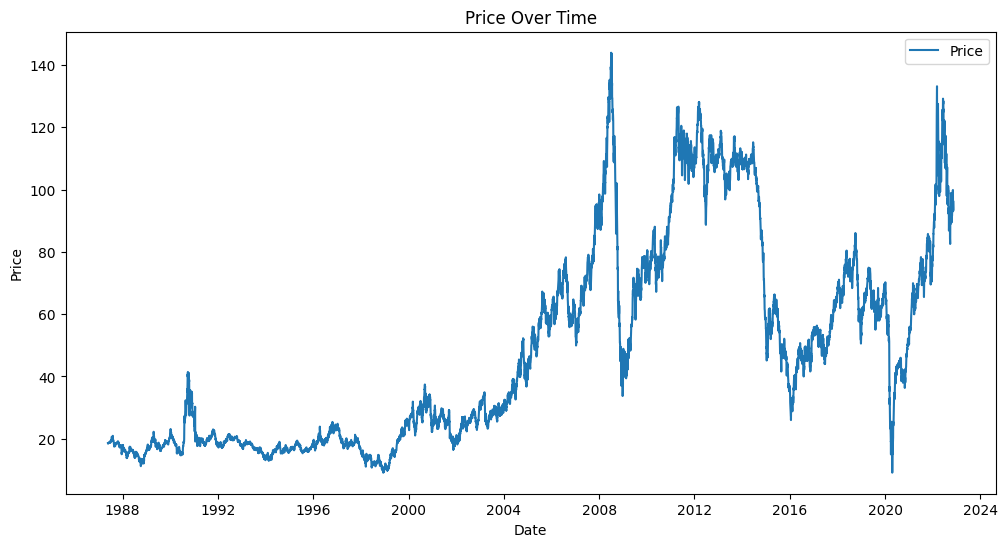

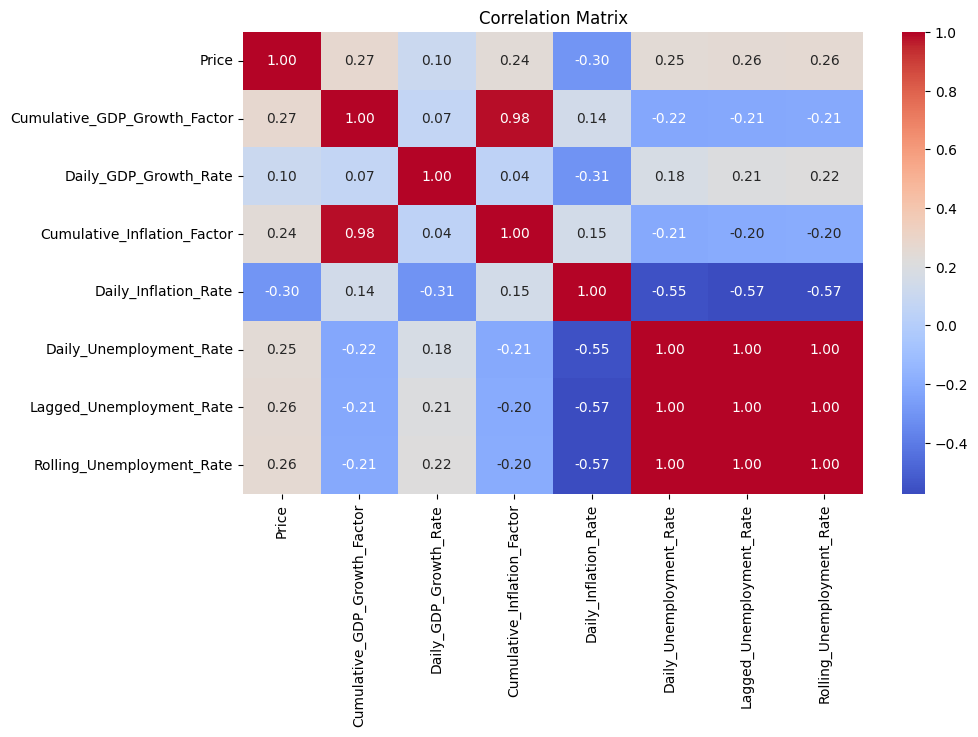

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

merged_data=pd.read_csv("../data/merged_with_economic_indic.csv")

# Convert 'Date' to datetime format
merged_data['Date'] = pd.to_datetime(merged_data['Date'])

# cols_to_convert = ['Price', 'EUR_USD_Ex_rate', 'Cumulative_GDP_Growth_Factor', 'Cumulative_Inflation_Factor']
# merged_data[cols_to_convert] = merged_data[cols_to_convert].apply(pd.to_numeric, errors='coerce')

# Set 'Date' as the index
merged_data.set_index('Date', inplace=True)
pd.to_numeric([])

# Plot the price over time
plt.figure(figsize=(12, 6))
plt.plot(merged_data['Price'], label='Price')
plt.title('Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(merged_data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

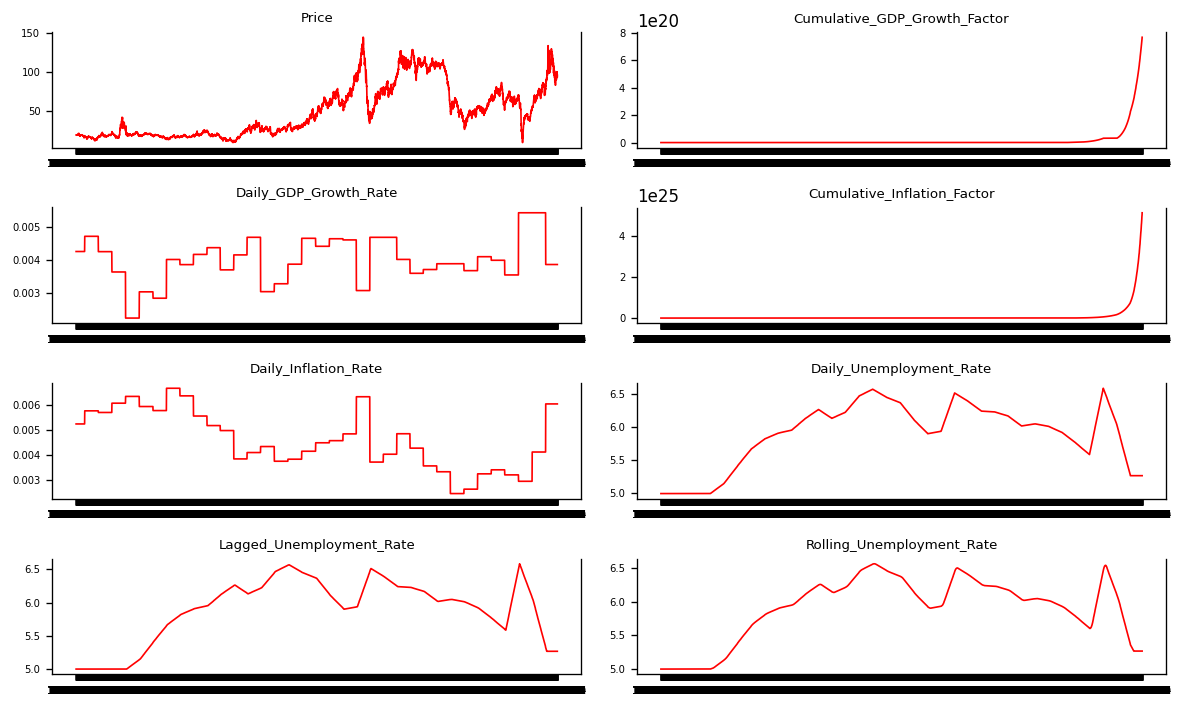

In [3]:
# Load and prepare the data
macro_data = pd.read_csv("../data/merged_with_economic_indic.csv", index_col='Date')

# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=2, dpi=120, figsize=(10, 6))

# Plot each data series
for ax, column in zip(axes.flatten(), macro_data.columns):
    ax.plot(macro_data[column], color='red', linewidth=1)
    ax.set_title(column, fontsize=8)  # Set title with smaller font
    ax.tick_params(labelsize=6)       # Adjust tick label size
    ax.spines["top"].set_alpha(0)     # Hide the top spine

plt.tight_layout()
plt.show()

In [8]:
import pandas as pd
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt

def perform_var_analysis(df, lags=None, forecast_steps=365):
    """
    Perform VAR analysis on the given DataFrame containing 'Brent_oil_price' and 'USD_EU_exchange_rate'.
    
    Parameters:
        df (pd.DataFrame): DataFrame containing 'Date', 'Brent_oil_price', and 'USD_EU_exchange_rate'.
        lags (int): Number of lags to consider for the VAR model. If None, it will use the optimal lag based on AIC.
        forecast_steps (int): Number of steps to forecast.
        
    Returns:
        model: Fitted VAR model.
        forecast: Forecasted values for the specified number of steps.
        forecast_index: Index for the forecasted values.
    """
    # Ensure the Date column is a datetime type and set it as the index
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)

    # Convert relevant columns to numeric, coercing errors to NaN
    df['Brent_oil_price'] = pd.to_numeric(df['Brent_oil_price'], errors='coerce')
    df['USD_EU_exchange_rate'] = pd.to_numeric(df['USD_EU_exchange_rate'], errors='coerce')

    # Drop rows with NaN values
    df.dropna(inplace=True)

    # Check for stationarity and difference if necessary
    df_diff = df.diff().dropna()

    # Fit the VAR model
    model = VAR(df_diff)
    
    # Select the optimal lag order if lags are not specified
    if lags is None:
        lags = model.select_order(maxlags=15).selected_orders['aic']
    
    fitted_model = model.fit(lags)
    
    # Forecasting
    forecast = fitted_model.forecast(df_diff.values[-lags:], steps=forecast_steps)
    
    # Create a DataFrame for the forecasted values
    forecast_index = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='D')
    forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=df.columns)
    
    print("Forecasted Values:")
    print(forecast_df)

    # Plot the original data and the forecasted values
    plt.figure(figsize=(14, 7))
    plt.plot(forecast_df['Brent_oil_price'], label='Forecasted Brent Oil Price', color='red')
    # plt.plot(df['Brent_oil_price'], label='Brent Oil Price', color='blue')
    plt.title('Brent Oil Price Forecast')
    plt.legend()

    # plt.subplot(2, 1, 2)
    # plt.plot(df['USD_EU_exchange_rate'], label='USD/EU Exchange Rate', color='green')
    # plt.plot(forecast_df['USD_EU_exchange_rate'], label='Forecasted USD/EU Exchange Rate', color='red')
    # plt.title('USD/EU Exchange Rate Forecast')
    # plt.legend()

    # plt.tight_layout()
    # plt.show()

    return fitted_model, forecast, forecast_df

# Example usage:
#df=pd.read_csv("../data/merged_with_economic_indic.csv")
# df = pd.read_csv('../data/brent_oul_usd_ex_merge.csv')  # Load your data into df
#model, forecast, forecast_df = perform_var_analysis(df)

In [ ]:
from statsmodels.tsa.stattools import adfuller,grangercausalitytests

def check_stationarity(ts):
    result = adfuller(ts)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    if result[1] < 0.05:
        print("The series is stationary")
    else:
        print("The series is not stationary")
        
data=pd.read_csv("../data/merged_with_economic_indic.csv")

# Check stationarity of Price, and Cumulative_Inflation_Factor
check_stationarity(data['Price'].diff()[1:].diff()[1:].diff()[1:])
print("\n")
#check_stationarity(data['EUR_USD_Ex_rate'].diff()[1:].diff()[1:].diff()[1:])
#print("\n")
check_stationarity(data['Cumulative_Inflation_Factor'].diff()[1:].diff()[1:].diff()[1:])
print("\n")
check_stationarity(data['Cumulative_GDP_Growth_Factor'].diff()[1:].diff()[1:].diff()[1:])
print("\n")
check_stationarity(data['Daily_Unemployment_Rate'].diff()[1:].diff()[1:].diff()[1:])

ADF Statistic: -33.13747199057228
p-value: 0.0
The series is stationary


ADF Statistic: -30.90936762511705
p-value: 0.0
The series is stationary


ADF Statistic: -32.25565472860807
p-value: 0.0
The series is stationary


ADF Statistic: -27.7884764728048
p-value: 0.0
The series is stationary


In [9]:
# macro_data=data[['Price','EUR_USD_Ex_rate','Cumulative_GDP_Growth_Factor','Cumulative_Inflation_Factor','Daily_Unemployment_Rate']]
# macro_data=data[['Price','Cumulative_GDP_Growth_Factor']]
macro_data=data[['Price','Cumulative_Inflation_Factor']]
print(macro_data.shape)

(9011, 2)


In [10]:
# train test ratio is 0.2
train_df=macro_data[:-1807]
test_df=macro_data[-1807:]

In [11]:
print(train_df['Price'].mean())

44.81763048306497


In [12]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series):
    result = adfuller(series.dropna())
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    
for column in train_df.columns:
    print(f'ADF Test for {column}:')
    adf_test(train_df[column].diff().diff().diff())

ADF Test for Price:
ADF Statistic: -31.681000988194562
p-value: 0.0
ADF Test for Cumulative_Inflation_Factor:
ADF Statistic: -29.950746507059133
p-value: 0.0


In [13]:
#  from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.api import VAR
model = VAR(train_df.diff()[1:].diff()[1:].diff()[1:])

In [14]:
sorted_order=model.select_order(maxlags=30)
print(sorted_order.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        87.63       87.63   1.140e+38       87.63
1        87.06       87.07   6.450e+37       87.06
2        86.82       86.83   5.091e+37       86.83
3        86.80       86.81   4.954e+37       86.80
4        85.51       85.53   1.369e+37       85.52
5        85.11       85.13   9.146e+36       85.11
6        84.86       84.88   7.119e+36       84.86
7        84.73       84.76   6.259e+36       84.74
8        84.72       84.75   6.190e+36       84.73
9        84.71       84.74   6.137e+36       84.72
10       84.69       84.73   6.017e+36       84.70
11       84.64       84.68   5.741e+36       84.66
12       84.63       84.68   5.678e+36       84.65
13       84.62       84.67   5.602e+36       84.63
14       84.60       84.66   5.516e+36       84.62
15       84.58       84.64   5.410e+36       84.60
16       84.56       84.62   5.

In [15]:
from statsmodels.tsa.statespace.varmax import VARMAX
var_model = VARMAX(train_df, order=(1,0),enforce_stationarity= True)
fitted_model = var_model.fit(disp=False)
# var_model = VAR(train_df.diff()[1:].diff()[1:].diff()[1:])
# fitted_model = var_model.fit(1)
print(fitted_model.summary())

c:\Users\Hello\Desktop\Html-Tutorial\Document\KAIM-Courses\Week-10_BrentOilPrice\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      Statespace Model Results                                      
Dep. Variable:     ['Price', 'Cumulative_Inflation_Factor']   No. Observations:                 7204
Model:                                               VAR(1)   Log Likelihood          -532132229.511
                                                + intercept   AIC                     1064264477.021
Date:                                      Tue, 05 Nov 2024   BIC                     1064264538.963
Time:                                              07:05:16   HQIC                    1064264498.334
Sample:                                                   0                                         
                                                     - 7204                                         
Covariance Type:                                        opg                                         
Ljung-Box (L1) (Q):       7199.51, 7153.02   Jarque-Bera (JB):   1215.91, 202929.37
Prob(Q)

In [16]:
n_forecast = 1807
predict = fitted_model.get_prediction(start=len(train_df),end=len(train_df) + n_forecast-1)#start="1989-07-01",end='1999-01-01')
# predictions = fitted_model.forecast(train_df.diff()[1:].diff()[1:].diff()[1:].values[-1:], steps=n_forecast)
predictions=predict.predicted_mean

In [17]:
predictions.columns=['Price_predicted','Cumulative_GDP_Growth_Factor_predicted']
predictions

,Price_predicted,Cumulative_GDP_Growth_Factor_predicted
7204,44.81763,1.725201e+20
7205,44.81763,1.725201e+20
7206,44.81763,1.725201e+20
7207,44.81763,1.725201e+20
7208,44.81763,1.725201e+20
...,...,...
9006,44.81763,1.725201e+20
9007,44.81763,1.725201e+20
9008,44.81763,1.725201e+20
9009,44.81763,1.725201e+20


In [18]:
test_vs_pred=pd.concat([test_df,predictions],axis=1)

In [19]:
test_vs_pred=test_vs_pred[['Price','Price_predicted']]

<Axes: >

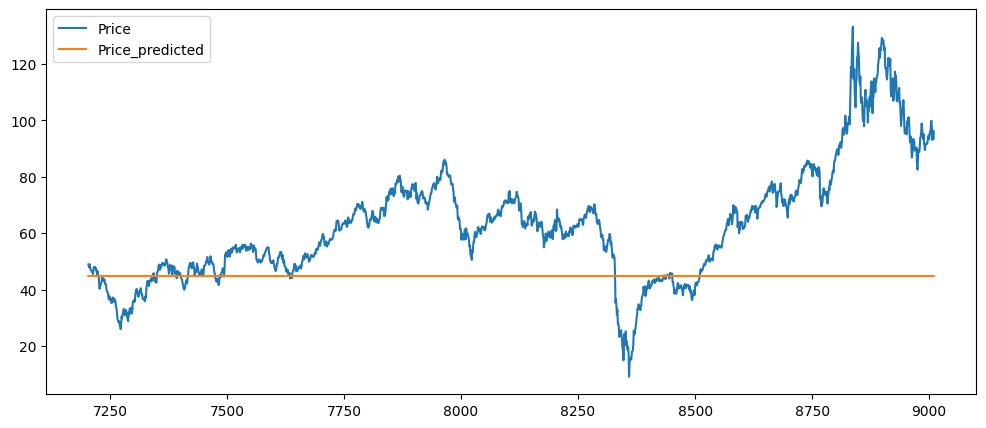

In [20]:
test_vs_pred.plot(figsize=(12,5))

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import numpy as np

# Assuming y_true and y_pred are your true and predicted values
y_true = test_df['Price']  # Replace with actual values
y_pred = predictions['Price_predicted'] # Replace with actual predicted values

# Calculate metrics
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_true, y_pred) * 100  # MAPE as a percentage

# Print metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape, "%")

Mean Absolute Error (MAE): 20.735299540745828
Mean Squared Error (MSE): 748.1181838484947
Root Mean Squared Error (RMSE): 27.35174919175179
Mean Absolute Percentage Error (MAPE): 30.118063488286417 %
